### $\rm Heun$法を用いて次の常微分方程式の数値解を求めるプログラム
### $$\dot{x} = x(1-x), \ x(0) = 0.01$$
ただし，刻み幅は$dt = 0.1$とする．

In [1]:
# ライブラリのインポート
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 常微分方程式の定義
def dxdt(t, x):
    return x*(1 - x)

In [3]:
# Heun法
def heun(dxdt, t, x, dt):
    """
    param dxdt:
    param t:
    param x:
    param dt: 刻み幅
    """
    k1 = dt*dxdt(t, x)
    k2 = dt*dxdt(t+dt, x+k1)
    x += (k1 + k2)/2
    t += dt

    return t, x

In [4]:
# Heun法によって区間[t_start, t_end]における常微分方程式の解を求める．
def solve_ode(dxdt, x_start, t_start, t_end, dt):
    """
    param dxdt:
    param x_start: xの初期値
    param t_start: tの初期値
    param t_end:   tの終了値
    param dt:      刻み幅
    """
    # 負の方向に計算する時は刻み幅の符号を反転
    if t_end < t_start:
        dt = -dt

    # t,xの初期値
    t = t_start
    x = x_start
    print("t = {:.7f},  x = {:.7f}".format(t, x))

    # t,xの値を格納するリスト
    t_list = [t_start]
    x_list = [x_start]

    while(True):
        t, x = heun(dxdt, t, x, dt)
        print("t = {:.7f},  x = {:.7f}".format(t, x))

        # t,xの値をリストに追加
        t_list.append(t)
        x_list.append(x)

        # 終了判定
        if t_end < t:
            print("Finished.")
            break

    return t_list, x_list

In [5]:
# Heun法による数値解
x_start = 0.01  # xの初期値
t_start = 0.0   # tの初期値
t_end   = 10.0  # tの終了値
dt      = 1e-1  # 刻み幅
[t_list, x_list] = solve_ode(dxdt, x_start, t_start, t_end, dt)

t = 0.0000000,  x = 0.0100000
t = 0.1000000,  x = 0.0110385
t = 0.2000000,  x = 0.0121834
t = 0.3000000,  x = 0.0134456
t = 0.4000000,  x = 0.0148365
t = 0.5000000,  x = 0.0163690
t = 0.6000000,  x = 0.0180568
t = 0.7000000,  x = 0.0199152
t = 0.8000000,  x = 0.0219605
t = 0.9000000,  x = 0.0242108
t = 1.0000000,  x = 0.0266854
t = 1.1000000,  x = 0.0294053
t = 1.2000000,  x = 0.0323933
t = 1.3000000,  x = 0.0356738
t = 1.4000000,  x = 0.0392730
t = 1.5000000,  x = 0.0432192
t = 1.6000000,  x = 0.0475424
t = 1.7000000,  x = 0.0522744
t = 1.8000000,  x = 0.0574492
t = 1.9000000,  x = 0.0631022
t = 2.0000000,  x = 0.0692708
t = 2.1000000,  x = 0.0759937
t = 2.2000000,  x = 0.0833108
t = 2.3000000,  x = 0.0912631
t = 2.4000000,  x = 0.0998921
t = 2.5000000,  x = 0.1092392
t = 2.6000000,  x = 0.1193453
t = 2.7000000,  x = 0.1302500
t = 2.8000000,  x = 0.1419910
t = 2.9000000,  x = 0.1546027
t = 3.0000000,  x = 0.1681156
t = 3.1000000,  x = 0.1825553
t = 3.2000000,  x = 0.1979408
t = 3.3000

In [6]:
# 厳密解
t = np.array(t_list)
D = -1.0 + 1.0/x_start
x = 1.0 / (1.0 + D*np.exp(-t))

In [7]:
# 数値解と厳密解の誤差
err = np.abs(x_list - x)

In [8]:
# matplotlibのレイアウト設定
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.size"] = 16

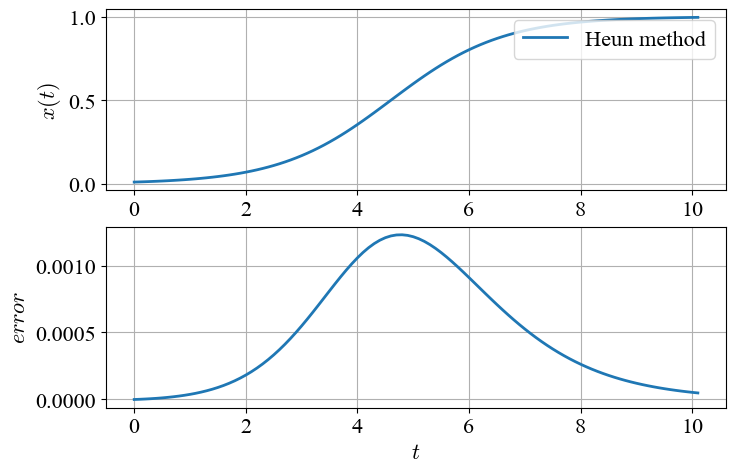

In [9]:
# グラフの描画
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(3,1,1)
ax1.plot(t_list, x_list, linewidth=2.0, label='Heun method')
ax1.set_ylabel('$x(t)$')
ax1.legend(loc='upper right')
ax1.grid(True)

ax = fig.add_subplot(3,1,2)
ax.plot(t_list, err, linewidth=2.0)
ax.set_xlabel('$t$')
ax.set_ylabel('$error$')
ax.grid(True)

plt.show()